In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd
import seaborn as sns

# Preparing Data

In [2]:
data = np.loadtxt('data.csv')
params = np.loadtxt('params.csv')
print(data.shape)
print(params.shape)

(100000, 128)
(100000, 2)


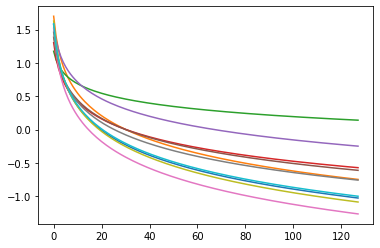

In [3]:
data_log = np.log(data)
data_log_norm = (data_log - np.mean(data_log))/np.var(data_log)
np.savetxt('data_log_norm.csv' , data_log_norm)
for i in range(10):
    plt.plot(data_log_norm[i])
plt.show()

# Regression Neural Network

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import tensorflow as tf 
print(tf.__version__)

2.3.1


In [6]:
def pred_model(i):
  model = keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(2)
  ])

 
  return model

In [9]:
model = pred_model(i)
model.build()
model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
model.summary()

ValueError: You must provide an `input_shape` argument.

In [10]:
history = model.fit(data_log_norm, params,
    validation_split=0.2, epochs=100 )

Epoch 1/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.1399 - val_loss: 0.0456
Epoch 2/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0357 - val_loss: 0.0343
Epoch 3/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0274 - val_loss: 0.0213
Epoch 4/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0236 - val_loss: 0.0246
Epoch 5/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0228 - val_loss: 0.0143
Epoch 6/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0212 - val_loss: 0.0298
Epoch 7/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0206 - val_loss: 0.0207
Epoch 8/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0194 - val_loss: 0.0149
Epoch 9/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0181 - val_loss: 0.0189
Epoch 10/100
2500/2500 [==============================] - 8s 3ms/step - l

In [76]:
print(model.predict(data_log_norm[10:15]))
print(params[10:15])

[[1.9527562  1.9350708 ]
 [0.8616841  2.1675003 ]
 [2.3390136  0.99277675]
 [2.071225   1.6525322 ]
 [0.61849284 2.1169202 ]]
[[1.95249594 1.94251506]
 [0.86103092 2.17054819]
 [2.33824145 0.99377238]
 [2.07064388 1.65872968]
 [0.61844337 2.09780507]]


In [73]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='train loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)


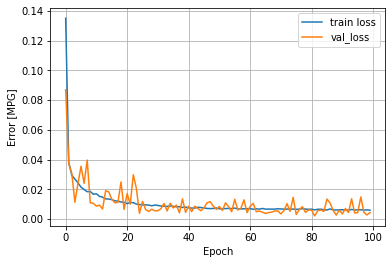

In [74]:
plot_loss(history)

In [77]:
model.save('fc_model')

INFO:tensorflow:Assets written to: fc_model/assets
